In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gammaincinv
plt.style.use(['science', 'notebook'])

In [98]:
lam=100
n_trials = 1000
n_voxels = 100

In [158]:
p_rv = np.random.poisson(lam=lam, size=(n_trials,n_voxels))

In [159]:
np.percentile(p_rv.max(axis=1), 50, interpolation='linear')

125.0

In [171]:
gammaincinv(lam, 0.5**(1/n_voxels))-1

125.2995706864293

In [170]:
np.std(p_rv.max(axis=1))

4.6757570510025435

Compute standard deviation of SUV_max

In [200]:
def compute_sigma_SUV_max(lam, n_voxels):
    p_rv = np.random.poisson(lam=lam, size=(n_trials,n_voxels))
    return np.std(p_rv.max(axis=1))

def compute_sigma_SUV_mean(lam, n_voxels):
    p_rv = np.random.poisson(lam=lam, size=(n_trials,n_voxels))
    return np.std(p_rv.mean(axis=1))

In [237]:
lams = np.linspace(1,200,200)
n_voxels = 50

In [240]:
sds_max = np.vectorize(compute_sigma_SUV_max)(lams,n_voxels)
sds_mean = np.vectorize(compute_sigma_SUV_mean)(lams,n_voxels)

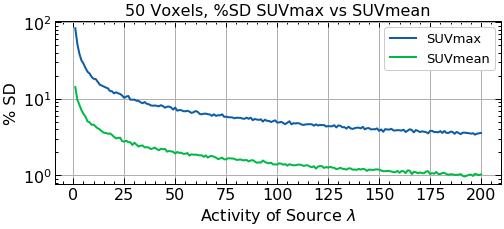

In [241]:
plt.figure(figsize=(8,3))
plt.title('50 Voxels, %SD SUVmax vs SUVmean')
plt.plot(lams, 100*sds_max/lams, label='SUVmax')
plt.plot(lams, 100*sds_mean/lams, label='SUVmean')
plt.xlabel('Activity of Source $\lambda$')
plt.ylabel('% SD')
plt.grid()
plt.semilogy()
plt.legend(ncol=1, fontsize=13, facecolor='white', framealpha=1, frameon=True, loc='upper right')
plt.show()

In [245]:
lam = 100
n_voxelss = np.arange(10,100,1)

In [246]:
sds_max = np.vectorize(compute_sigma_SUV_max)(lam,n_voxelss)
sds_mean = np.vectorize(compute_sigma_SUV_mean)(lam,n_voxelss)

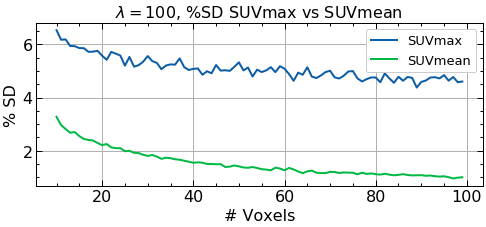

In [248]:
plt.figure(figsize=(8,3))
plt.title('$\lambda=100$, %SD SUVmax vs SUVmean')
plt.plot(n_voxelss, 100*sds_max/lam, label='SUVmax')
plt.plot(n_voxelss, 100*sds_mean/lam, label='SUVmean')
plt.xlabel('# Voxels')
plt.ylabel('% SD')
plt.grid()
#plt.semilogy()
plt.legend(ncol=1, fontsize=13, facecolor='white', framealpha=1, frameon=True, loc='upper right')
plt.show()